In [1]:
################################################################################################
################ CMSC320 HW2: Moneyball
################ Group_Students: Ang Zhou, Han Yang Shen, Jixiang Fan
################################################################################################
import sqlite3
import pandas as pd
import numpy as np
################ Part 1 ################
# Problem 1 #

## Extract data from the database
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

salary_query = "SELECT teamID, yearID, \
            sum(salary) as total_payroll FROM Salaries GROUP BY teamID,yearID ORDER BY teamID"

team_salaries = pd.read_sql(salary_query, conn)

win_rate_query = "SELECT teamID, yearID,sum(W) as total_wins, \
            sum(W)+sum(L) as total_games, \
            100*CAST(sum(W) AS float)/(sum(W)+sum(L)) as 'win_rate%', franchID FROM teams \
            GROUP BY teamID,yearID ORDER BY teamID"
team_win_rate = pd.read_sql(win_rate_query, conn)

## inner join these two tables to get rid of the missing data.
relationship=team_salaries.merge(team_win_rate, how = "inner", left_on = ["teamID","yearID"], right_on = ["teamID","yearID"])
relationship

,teamID,yearID,total_payroll,total_wins,total_games,win_rate%,franchID
0,ANA,1997,31135472.0,84,162,51.851852,ANA
1,ANA,1998,41281000.0,85,162,52.469136,ANA
2,ANA,1999,55388166.0,70,162,43.209877,ANA
3,ANA,2000,51464167.0,82,162,50.617284,ANA
4,ANA,2001,47535167.0,75,162,46.296296,ANA
5,ANA,2002,61721667.0,99,162,61.111111,ANA
6,ANA,2003,79031667.0,77,162,47.530864,ANA
7,ANA,2004,100534667.0,92,162,56.790123,ANA
8,ARI,1998,32347000.0,65,162,40.123457,ARI
9,ARI,1999,68703999.0,100,162,61.728395,ARI


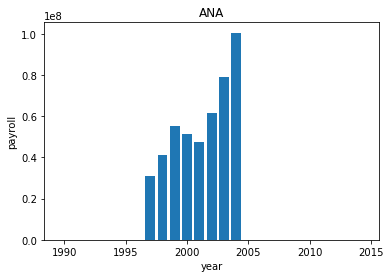

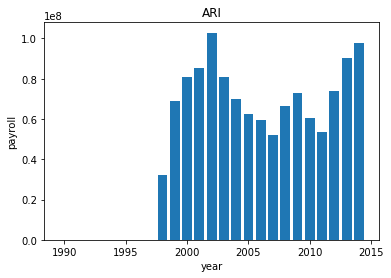

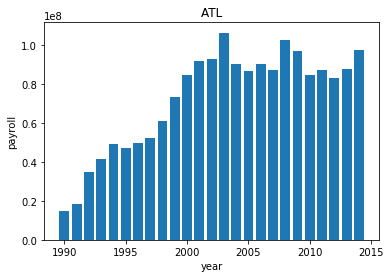

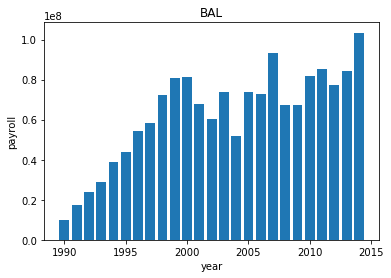

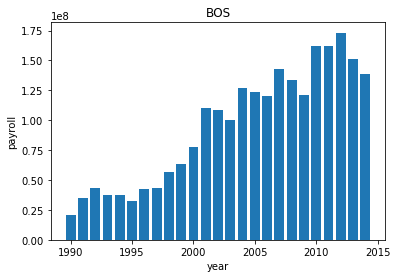

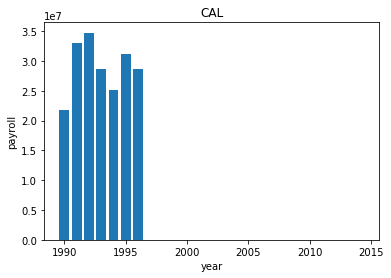

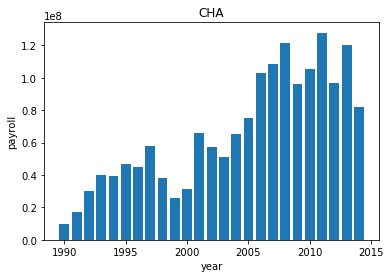

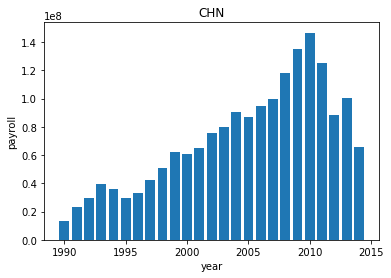

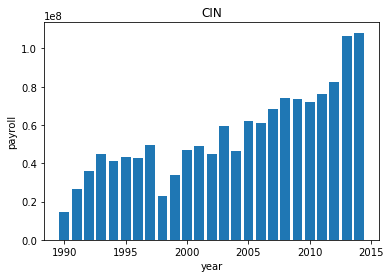

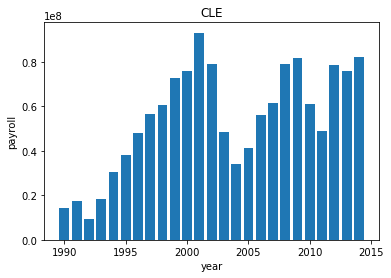

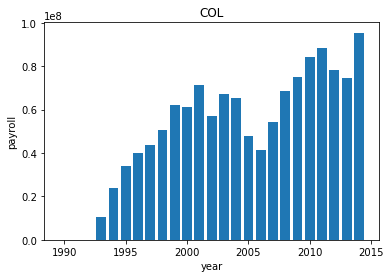

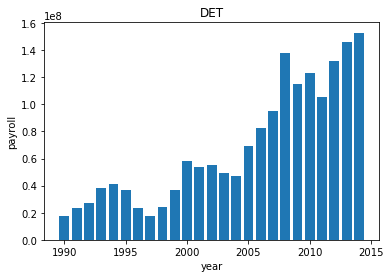

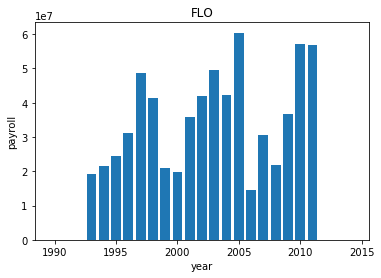

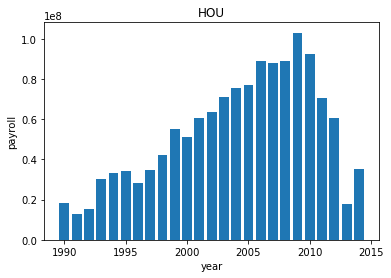

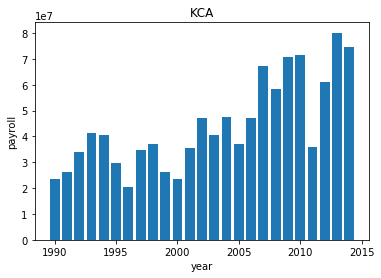

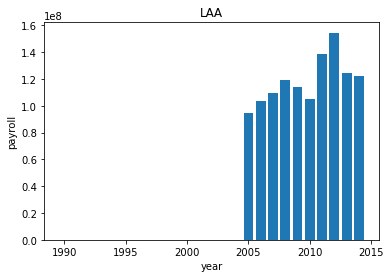

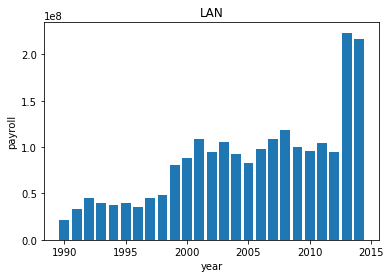

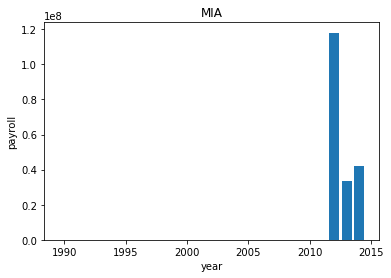

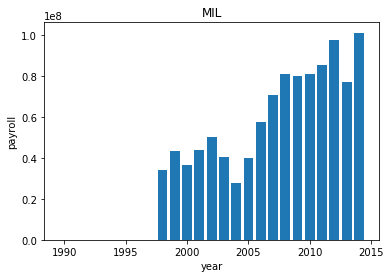

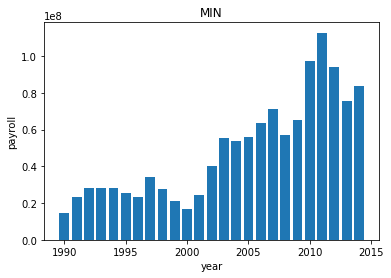

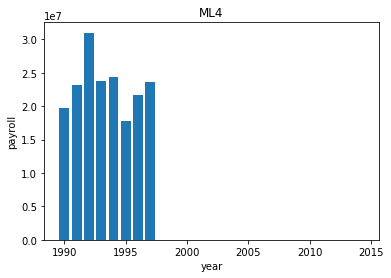

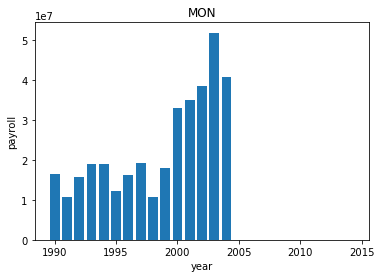

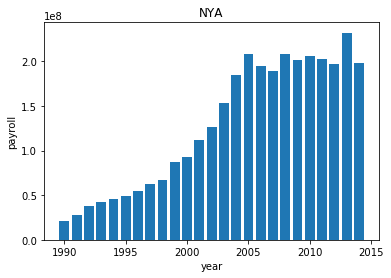

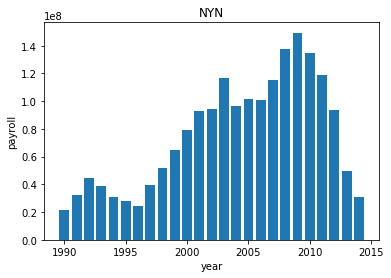

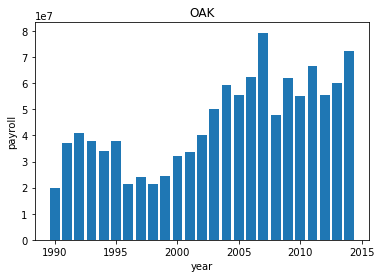

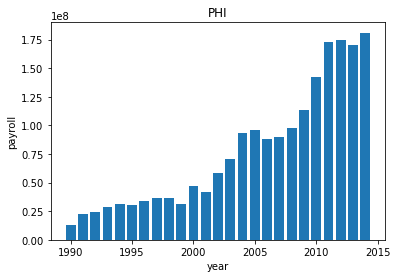

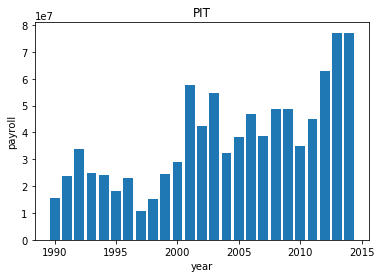

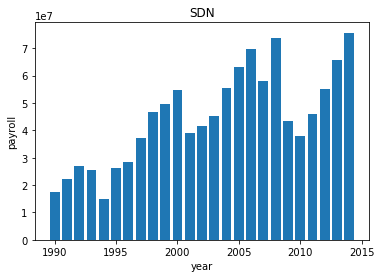

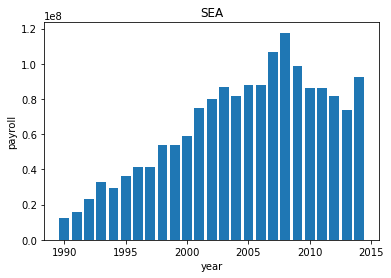

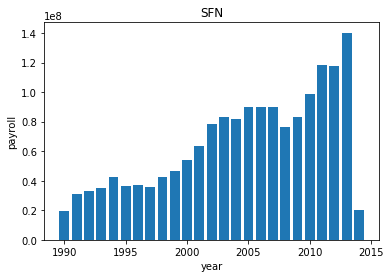

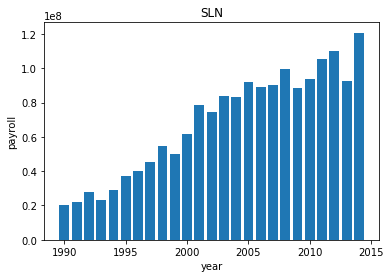

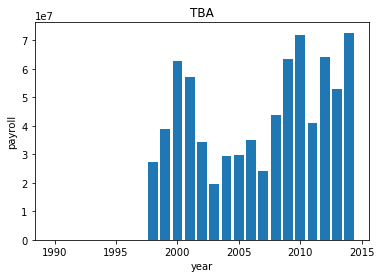

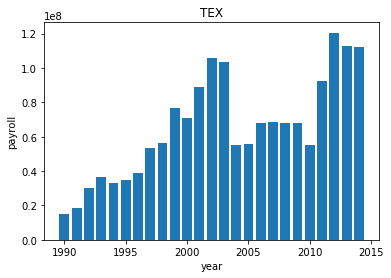

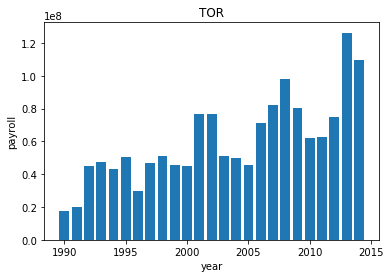

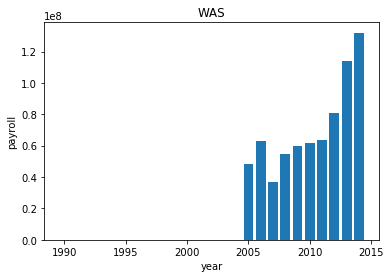

In [2]:
################ Part 2 ################
# Problem 2 #
import matplotlib.pyplot as plt

teams_list=np.unique(relationship.iloc[:,0].values)

## Plot 35 graphs, each for one team. X-axis is the years from 1990 to 2014. y-axis is the total_payroll
## of this team across the time.
for team in teams_list:
    temp_df=pd.DataFrame({'yearID':range(1990,2015)})
    temp_relation=relationship[['yearID','teamID','total_payroll']]
    temp_group=temp_relation.groupby(['teamID']).get_group(team)
    temp_table=temp_df.merge(temp_group, how = "left", left_on = ['yearID'], right_on = ['yearID'])
        
    plt.bar(temp_table['yearID'],temp_table['total_payroll'].fillna(value=0))
    plt.xlabel("year")
    plt.ylabel("payroll")
    plt.title(team)
    plt.show()


In [3]:
# Question 1 #
## There is a trend for total payrolls to increase over time, since the payroll of almost each team increase over time.
## So the central tendency of the mean payroll might be increasing over time. (Ignore the missing data)

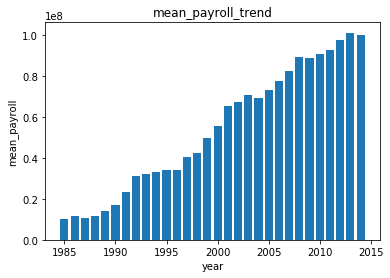

In [4]:
# Problem 3 #

## plot a graph to show the relationship betweem the mean_payroll of all the teams and  years (1985-2014)
mean_payroll_trend=(relationship[['yearID','total_payroll']].groupby('yearID')).mean()
plt.bar(mean_payroll_trend.index,mean_payroll_trend['total_payroll'])
plt.xlabel("year")
plt.ylabel("mean_payroll")
plt.title("mean_payroll_trend")
plt.show()
## Now we can see directly that the mean payroll increased over time form 1985 to 2014, which match the assumption made in 
## Question 1.

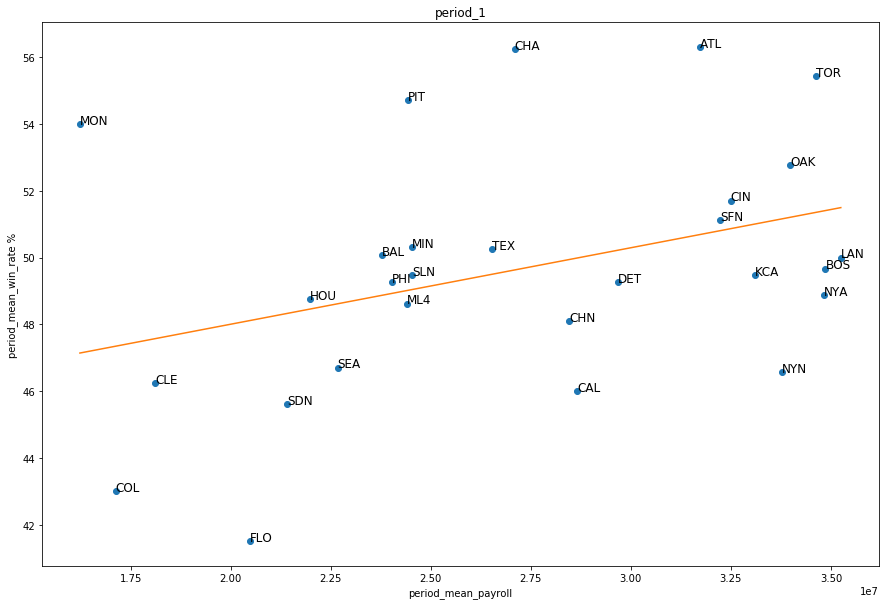

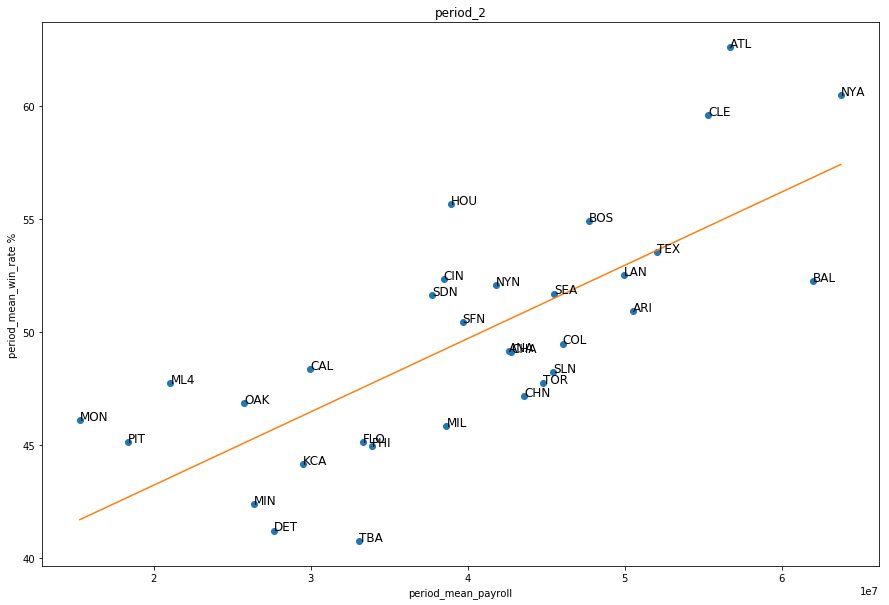

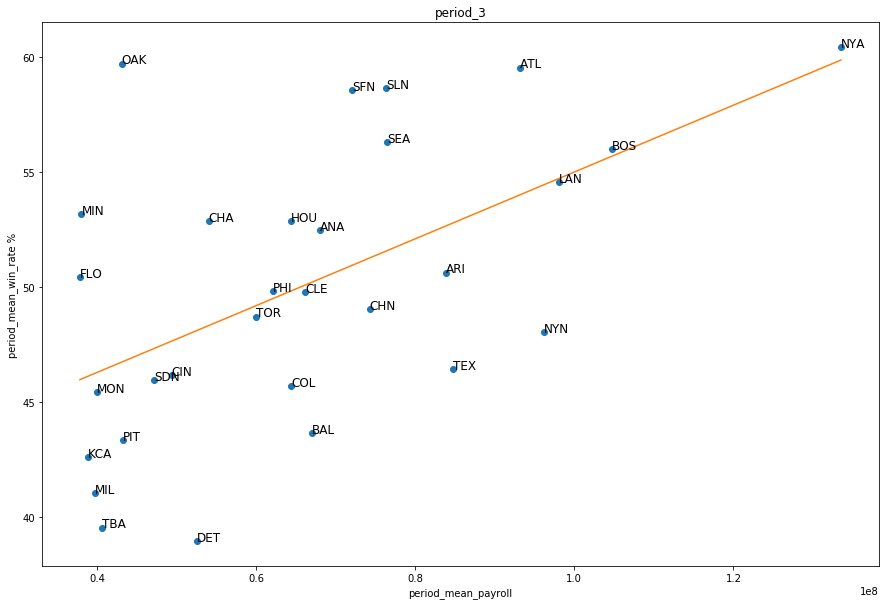

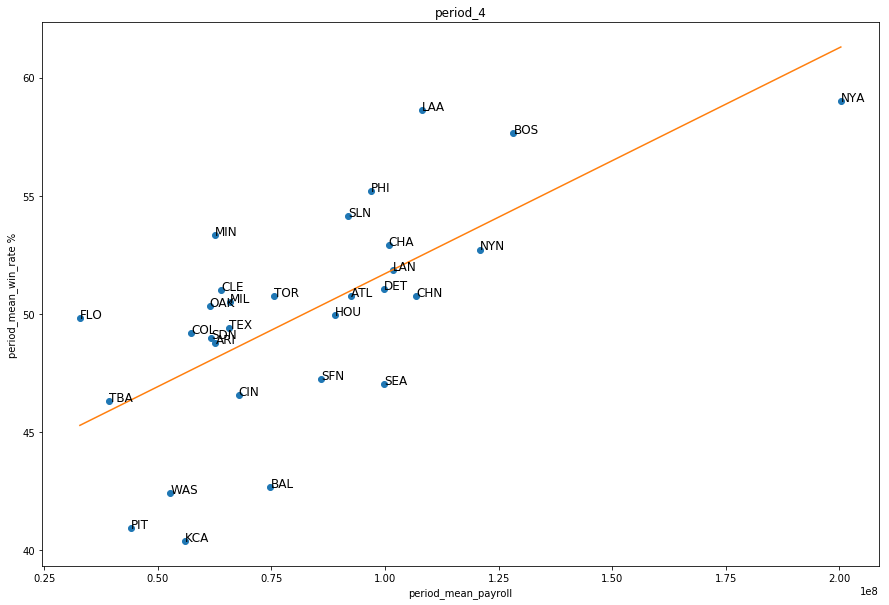

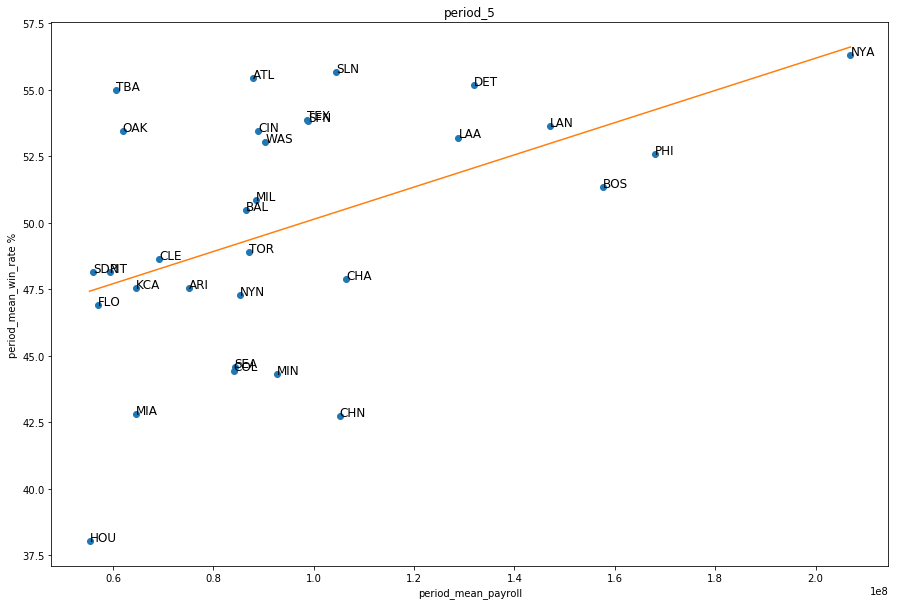

In [5]:
# Problem 4 # 

## seperating the 25 years (1990~2014) to 5 periods, each period have 5 years.
temp_df=pd.DataFrame({'yearID':range(1990,2015)})
temp_relation=relationship[['yearID','teamID','total_payroll','total_wins','total_games']]
temp_table=temp_df.merge(temp_relation, how = "left", left_on = ['yearID'], right_on = ['yearID'])

bins = [1990,1995,2000,2005,2010,2015]
group_names=['period_1','period_2','period_3','period_4','period_5']
temp_table['categories'] = pd.cut(temp_table['yearID'],bins,right=False, labels=group_names)

## Plot 5 graphs, each for one period. x-axis is the mean payroll of this period and y-axis is the win_rate of this period.
## Since there are totally 35 teams from 1990 to 2014, there are up to 35 scatter points on each graph.
## Based on these points, make a regression line for each graphs.
for period in group_names:
    win_rate_table=temp_table.groupby(['categories']).get_group(period)\
                                    .drop('total_payroll',1).drop('yearID',1).groupby(['teamID']).sum().reset_index()
    win_rate_table['period_win_rate%'] = 100*win_rate_table['total_wins'] / win_rate_table['total_games']
    win_rate_table=win_rate_table.drop('total_wins',1).drop('total_games',1)

    mean_payroll_table=temp_table.groupby(['categories']).get_group(period)\
                                    .drop('total_wins',1).drop('yearID',1).drop('total_games',1).groupby(['teamID']).mean().reset_index()
    mean_payroll_table.columns=['teamID', 'period_mean_payroll']
        
    final_table=mean_payroll_table.merge(win_rate_table)
    
    x_data=final_table['period_mean_payroll'].values
    y_data=final_table['period_win_rate%'].values
    z=np.polyfit(x=x_data,y=y_data,deg=1)
    f=np.poly1d(z)
    x_new = np.linspace(x_data.min(), x_data.max(), 100)
    y_new = f(x_new)
    plt.figure(figsize=(15,10))
    plt.plot(x_data, y_data,'o',x_new,y_new)
    
    ## annotate each point with its team name.
    for i, txt in enumerate(final_table['teamID']):
        plt.annotate(txt, (x_data[i],y_data[i]),size=12)
    
    plt.xlabel("period_mean_payroll")
    plt.ylabel("period_mean_win_rate %")
    plt.title(period)
    plt.show()

In [6]:
# Question 2 # 
## Statmenet 1: The team payrolls is increasing accross these period (the unit of x-axis change from 10^7 to 10^8)
## Statement 2: According to the interpolation line, basically, if payroll is larger, the win_rate is higher.\
## Statement 3: The teams above the interpolation line implies that they have a relatively higher efficiency\
##              on using their money in that period(paying less but gaining higher win_rate)
## Statement 4: The team NYA is always at the upper-right corner(except period 1), so basically, this team\
##              use the strategy that paying more and gain a higher win_rate.
## Statement 5: ATL did pretty good on using money efficiently. The point is always above the interpolation\
##              line with a large scale (except period_4)
## Statmenet 6: OAK is always locate at the left half of the graph (except period_1), which means it spent less money.\
##              But, it always locate above the interpolation line with large scale. Especially in period_3,\
##              OAK's payroll was one of the least, but its win_rate is one of the highest, which means OKA's
##              spending efficiency at that time period is very high!!!

In [7]:
################ Part 3 ################
# Problem 5 # 
mean_payroll = (relationship[['yearID','total_payroll']].groupby('yearID')).mean()
std = (relationship[['yearID','total_payroll']].groupby('yearID')).std()

mean_payroll.columns = ['mean_payroll']
std.columns = ['std']
new_table = temp_table.drop('total_wins',1).copy()

## changing the column name from 'total_games' to 'std_payroll' and assign new datas to this column by using for loop.
new_table.columns = ['yearID', 'teamID', 'total_payroll', 'std_payroll', 'categories']

for index, row in new_table.iterrows():
    new_table.set_value(index, ['std_payroll'], \
            (row['total_payroll'] - mean_payroll['mean_payroll'][row["yearID"]]) / std['std'][row["yearID"]])

new_table = temp_df.merge(new_table, how = "left", left_on = ['yearID'], right_on = ['yearID'])

new_table

,yearID,teamID,total_payroll,std_payroll,categories
0,1990,ATL,14555501.0,-0.667275,period_1
1,1990,BAL,9680084.0,-1.959861,period_1
2,1990,BOS,20558333.0,0.924213,period_1
3,1990,CAL,21720000.0,1.232198,period_1
4,1990,CHA,9491500.0,-2.009859,period_1
5,1990,CHN,13624000.0,-0.914238,period_1
6,1990,CIN,14370000.0,-0.716456,period_1
7,1990,CLE,14487000.0,-0.685437,period_1
8,1990,DET,17593238.0,0.138098,period_1
9,1990,HOU,18330000.0,0.333431,period_1


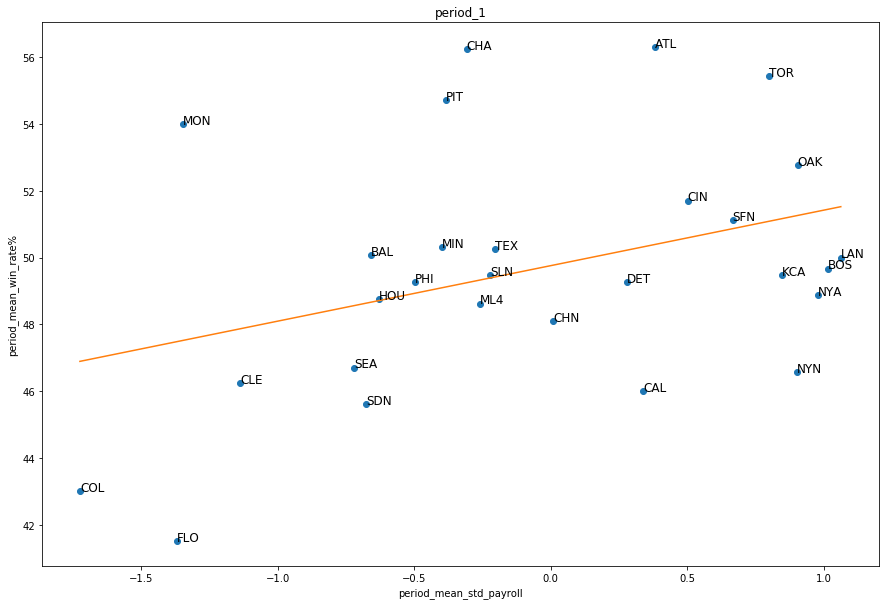

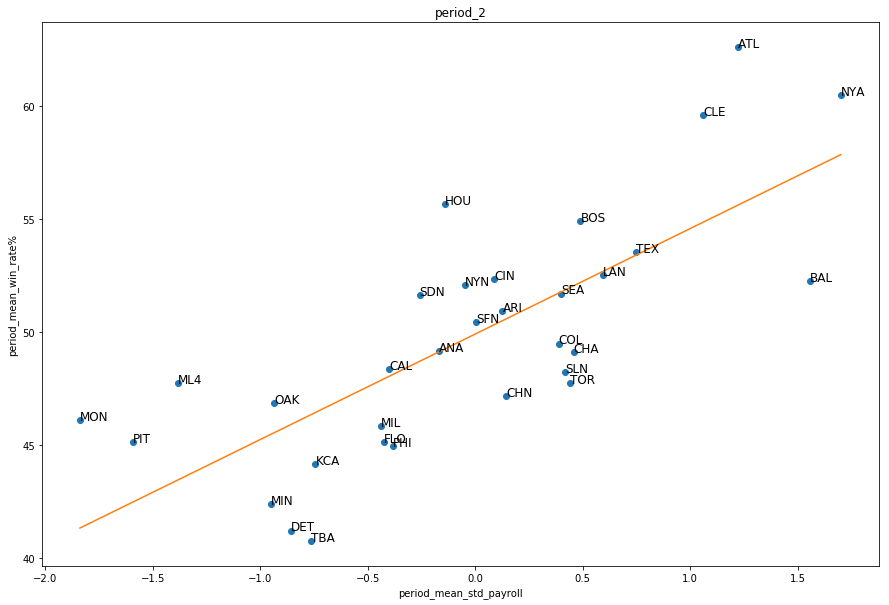

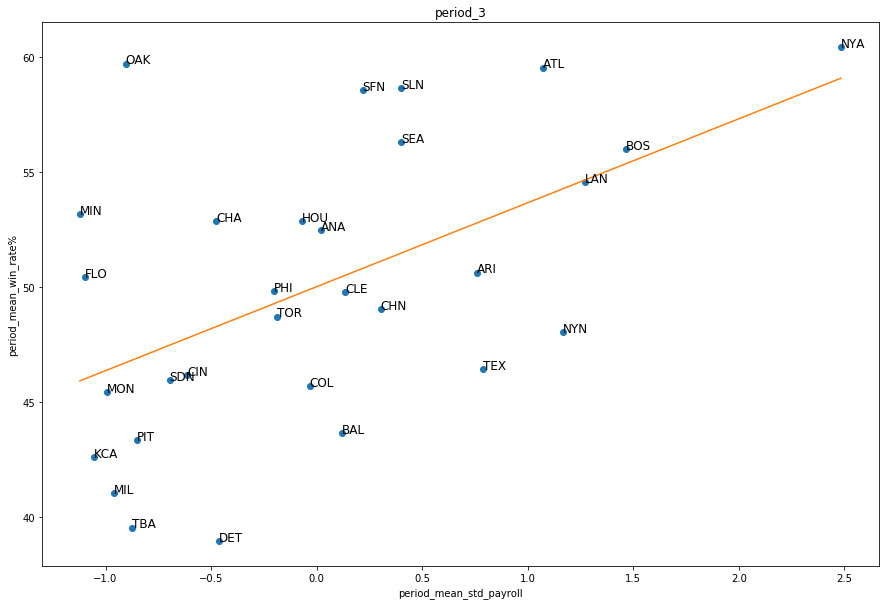

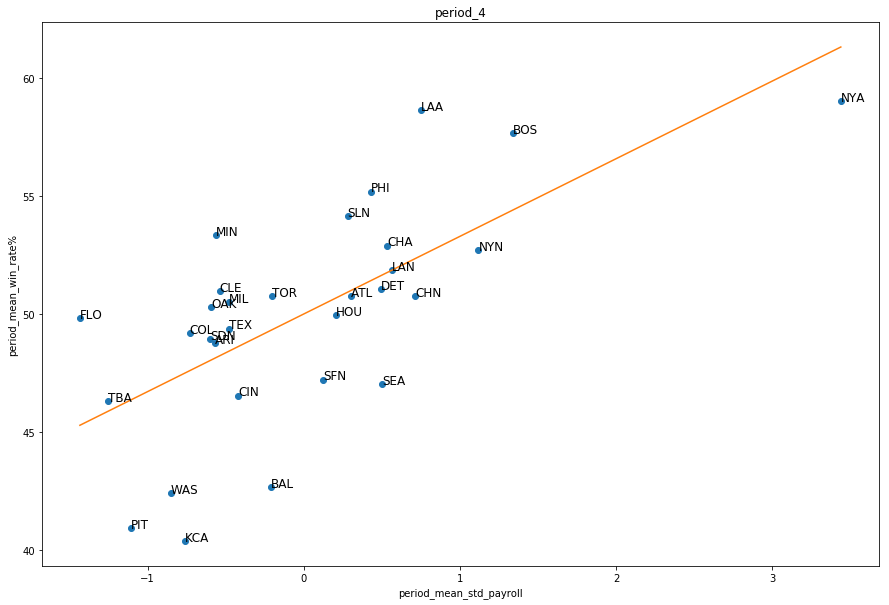

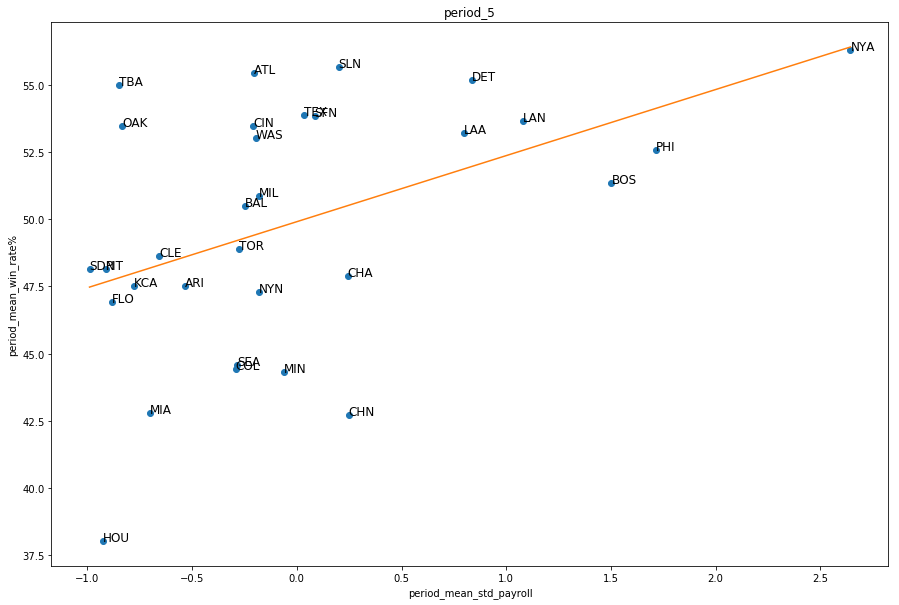

In [8]:
# Problem 6 # 
## Plot 5 graphs, each for one period. x-axis is the standardized payroll of this period (not exactly since we calculate
## the mean of standardized payroll of 5 years, and this is not the standardized payroll of this period. But it is very
## close to the standardized payroll. To get the exact standardized payroll of this period, we need to redo the problem 5
## again based on periods instead of years, and the variables got in problem 5 didn't do any contribution to get the 
## exact answer.) and y-axis is the win_rate of this period. Since there are totally 35 teams from 1990 to 2014, 
## there are up to 35 scatter points on each graph. Based on these points, make a regression line for each graphs.
for period in group_names:
    std_payroll_table = new_table.groupby(['categories']).get_group(period)\
                                   .drop('total_payroll',1).drop('yearID',1).groupby(['teamID']).mean().reset_index()
    std_payroll_table.columns=['teamID','period_std_payroll']
    
    win_rate_table=temp_table.groupby(['categories']).get_group(period)\
                                    .drop('total_payroll',1).drop('yearID',1).groupby(['teamID']).sum().reset_index()
    win_rate_table['period_win_rate%'] = 100*win_rate_table['total_wins'] / win_rate_table['total_games']
    win_rate_table=win_rate_table.drop('total_wins',1).drop('total_games',1)
        
    final_table = win_rate_table.merge(std_payroll_table)
    x_data=final_table['period_std_payroll'].values
    y_data=final_table['period_win_rate%'].values
    z=np.polyfit(x=x_data,y=y_data,deg=1)
    f=np.poly1d(z)
    x_new = np.linspace(x_data.min(), x_data.max(), 100)
    y_new = f(x_new)
    plt.figure(figsize=(15,10))
    plt.plot(x_data, y_data,'o',x_new,y_new)
    
    ## annotate each point with its team name.
    for i, txt in enumerate(final_table['teamID']):
        plt.annotate(txt, (x_data[i],y_data[i]),size=12)
    
    plt.xlabel("period_mean_std_payroll")
    plt.ylabel("period_mean_win_rate%")
    plt.title(period)
    plt.show()

In [9]:
# Question 3 # 
## The shape of the plots in Probelm 6 are almost the same with the polts in Problem 4. The unit and the range of X-coordinate
## changed. By doing standardizaion, we can see which data is near the mean point directly. And we can know with straight 
## forward sense that in what degree is a data away from the mean.

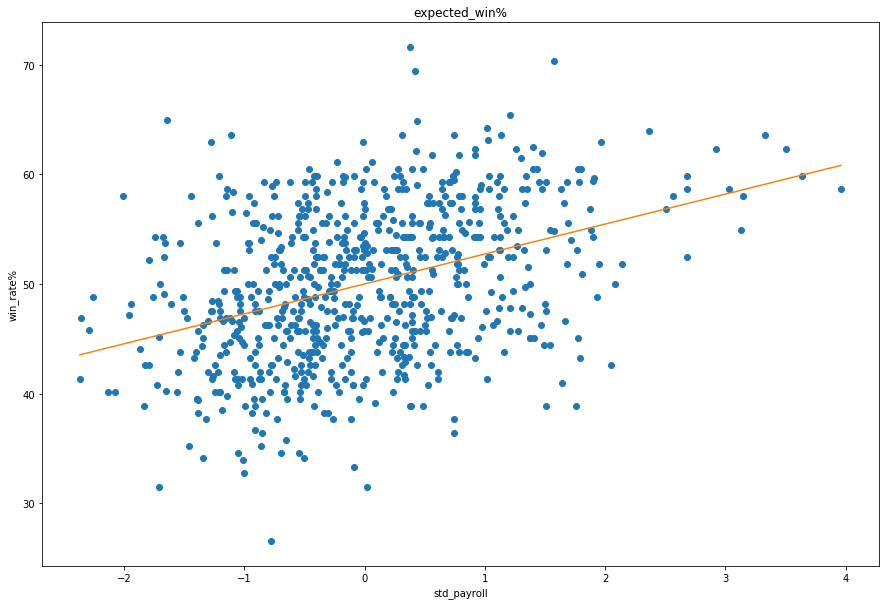

,teamID,yearID,win_rate%,std_payroll,expected_win%
0,ATL,1990,40.123457,-0.667275,48.331811
1,BAL,1990,47.204969,-1.959861,45.100348
2,BOS,1990,54.320988,0.924213,52.310533
3,CAL,1990,49.382716,1.232198,53.080495
4,CHA,1990,58.024691,-2.009859,44.975353
5,CHN,1990,47.530864,-0.914238,47.714405
6,CIN,1990,56.172840,-0.716456,48.208860
7,CLE,1990,47.530864,-0.685437,48.286408
8,DET,1990,48.765432,0.138098,50.345246
9,HOU,1990,46.296296,0.333431,50.833577


In [10]:
# Problem 7 # 
#in problem 7, we plot the expected win percentage graph with a regression line to show a linear relation between win rate and
#std_payroll. At the end, we show the whole table of the expected win perecentage for each team each year

temp_relation=relationship[['yearID','teamID','total_payroll','win_rate%']]
temp_table=temp_df.merge(temp_relation, how = "left", left_on = ['yearID'], right_on = ['yearID'])
expected_win_pct = temp_table[['teamID','yearID','win_rate%']].copy()
expected_win_pct['std_payroll'] = new_table['std_payroll']

#plot the expected_win% graph
x_data=expected_win_pct['std_payroll'].values
y_data=expected_win_pct['win_rate%'].values
z=np.polyfit(x=x_data,y=y_data,deg=1)
f=np.poly1d(z)
x_new = np.linspace(x_data.min(), x_data.max(), 100)
y_new = f(x_new)
plt.figure(figsize=(15,10))
plt.plot(x_data, y_data,'o',x_new,y_new)

#graph label
plt.xlabel("std_payroll")
plt.ylabel("win_rate%")
plt.title("expected_win%")
plt.show()

#calculate the the expected win percentage with given formula
expected_win_pct['expected_win%']  = expected_win_pct['std_payroll']*2.5+50

#show the expected win percentage for each team each year, ordered by year
expected_win_pct

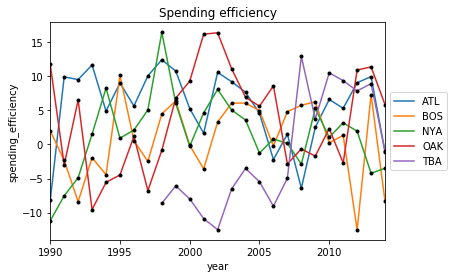

In [11]:
# Problem 8 # 
#in problem 8. we plot a graph of spend efficiency for Oakland, the New York Yankees, Boston, Atlanta and Tampa Bay, using the existing tables

temp = temp_table[['yearID', 'teamID', 'win_rate%']].copy()
temp['expected_win%'] = expected_win_pct['expected_win%']
temp['spending_efficiency'] = temp['win_rate%'] - temp['expected_win%']

#take the recommanded five teams' data
spending_efficiency = temp.loc[temp['teamID'].isin(['OAK', 'BOS', 'NYA', 'ATL', 'TBA'])].sort_values(['teamID', 'yearID'], ascending = [True, True])

#construct and show the line plot graph
fig, ax = plt.subplots()
labels = []

#construct line grpah for each team
for key, grp in spending_efficiency.groupby(['teamID']):
    ax = grp.plot(ax=ax, kind='line', x='yearID', y='spending_efficiency')
    labels.append(key)
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

#show all team's graph with plots
plt.plot(spending_efficiency['yearID'].values, spending_efficiency['spending_efficiency'].values ,'.', c = 'black')
plt.xlabel("year")
plt.ylabel("spending_efficiency")
plt.title("Spending efficiency")
plt.show()

In [12]:
# Question 4 # 
## This plot gives us the information of spending_effficency with more details. As I observed in Question 2, ATL, NYA, OKA,
## all have a large part of time with positive spending_efficiency. OKA done pretty well in the period 2000-2004,
## which is period_3, as I claimed in Question 2.
## What I didn't observed in Question 2 and 3 are some of the sudden spending_efficiency changes in a small period,
## such as NYA's great spending_effiency in 1998.